# CAPÍTULO 2

## INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - DISEÑO DE SISTEMAS

Ahora que hemos visto una visión general de los sistemas e ML en el mundo real, podemos pasar a la parte divertida de diseñar realmente un sistema de ML. Para reiterar lo dicho en el primer capítulo, el diseño de sistemas de ML adopta un enfoque sistémico de MLOps, lo que significa que consideraremos un sistema de ML de forma holística para garantizar que *todos los componentes, los requisitos empresarias, la pila de datos, la infraestructura, la implementación, la supervisión, etc*, y sus partes interesadas puedan trabajar juntos para satisfacer los objetivos y requistos especificados.

Comenzaremos el capítulo con una discusión sobre los objetivos. Antes de desarrollar un sistema de ML, debemos entender por qué se necesita este sistema. Si este sistema se construye para una empresa, debe estar impulsado por objetivos empresariales, que deberán traducirse en objetivos de ML para guiar el desarrollo de los modelos de ML.

Una vez que todo el mundo esté de acuerdo con los objetivos de nuestro sistema de ML, tendremos que establecer algunos requisitos para guiar el desarrollo de este sistema. En este libro, consideraremos los cuatro requisitos: *fiabilidad, escalabilidad, mantenibilidad y adaptabilidad*. A continuación, pesentaremos el proceso iterativo para diseñar sistemas que cumplan dichos requisitos.

Tal vez se pregunta: con todos estos objetivos, requisito y procesos, ¿ya puedo empezar a construir mi modelo de ML? No tan pronto. Antes de utilizar algoritmos de ML para resolver su problema, primero necesita enmarcar su problema en una atrea que ML pueda resolver. Continuaremos esta capítulo con cómo enmarcar sus problemas de ML. La dificultad de su trabajo puede cambiar significativamente dependiendo de cómo enmarque su problema.

Dado que el ML es un enfoque basado en los datos, un libro sobre el diseño de sistemas de ML será un error si no analiza la importancia de los datos en los sistemas de ML. La última parte de este capítulo aborda un debate que ha consumido gran parte de la literatura sobre ML en los últimos años: ¿qué es más importante, los datos o los algoritmos inteligentes?.

Empecemos.

## Objetivos Empresariales y de LD

En primer lugar, debemos considerar los objetivos de los proyectos de ML propuestos. Cuando trabajan en un proyecto de ML, los científicos de datos tienden a preocuparse por los objetivos de ML: las métricas que pueden medir sobre el rendimiento de sus modelos de ML, como la *precisión, la puntuación F1, la latencia de la interferencia, etc.* Les entusiasma la idea de mejorar la precisión de su modelo del 94% al 94,2% y pueden gastar una toneleada de recursos (datos, computación y tiempo de ingeniería) para conseguirlo.

Pero la verdad es que la mayoría de las empresas no les importan las métricas de ML. No les importa aumentar la precisión de un modelo del 94% al 94,2% a menos que mueva alguna métrica de negocio. Un patrón que veo en mucho proyectos de ML de corta duración es que los científicos de datos se centran demasiado en hackear las métricos de ML sin prestar atención a las métricas del negocio. Sus jedes, sin embargo, sólo se preocupan por las métricas de negocio y, después de no ver cómo un proyecto de ML puede ayudar a impulsar sus métricas de negocio, matan los proyectos prematuramente (y posiblemente dejan ir al equipo de científicos de datos involucrados).

Entonces, ¿qué parámetros les importan a las empresas? Aunque la mayoría de las empresas quieren convencer de lo contrario, **el único propósito de las empresas, según el premio Nobel de Economía Milton Friedman, es maximizar los beneficios para los accionistas**.

El objetivo último de cualquier proyecto en una empresa es, por tanto, aumentar los beneficios, ya sea directa o indirectamnte: directamente, `como el aumento de las ventas (tasa de conversión)` y la reducción de costoes; indirectamente, `como una mayor satisfacción de los clientes` y el `aumento del tiempo de permanencia en un sitio web`.

Para que un proyecto de ML tenga éxito dentro de una organización empresarial, es crucial vincular el rendimiento de un sistema de ML al rendimiento general de la empresa. En qué métricas de rendimiento empresarial se supone que debe influir el nuevo sistema de ML, por ejemplo, la cantidad de ingresos por anuncios, el número de usuarios activos mensualmente?



---

<small>

📚 1 Eugene Yan tiene un gran post sobre cómo los científicos de datos pueden entender la intención empresarial y el contexto de los proyectos en los que trabajan.

📚 2 Milton Friedman, "A Friedman Doctrine-The Social Responsibility of Business Is to Increase Its Profits" ("La doctrina Friedman: la responsabilidad social de las empresas es aumentar sus beneficios"). New York Times Magazine, 13 de septiembre de 1970, https://oreil.ly/Fmbem

</small>

---

Imagínese que trabaja para un sitio de comercio electrónico al que le importa el porcentaje de comprar y quiere que su sistema de recomendación pase de la prediccón por lotes a la predicción en línea.


<small>
💡 <b>TIP IMPORTANTE </b>

- Prediccón por lotes (batch prediction) --> El modelo predice muchos datos a la vez, en un proceso programado (por ejemplo, cada hora o cada día). Se usa cuando no se necesita respuesta inmediata. Es más eficienre en costo y cómputo. Ejemplo de este tipo de prodicción: calcular cada noche el riesgo de abandono de todos los clientes.

- Predicción en línea (online / real-time prediction) --> El modelo predice datos por datos, en tiempo real, cuando llega una solicitud. Se usa cuando la respuesta debe ser inmediata. Requiere baja latencia y mayor infraestructura. Ejmeplos de este tipo de predicción en línea: Recomendaciones de un productos mientras el usuario navega.

</small>

---


Puede razonar que la predicción en línea permitirá recomendaciones más relevantes para los usuarios en este momento, lo que puede conducir a un mayor porcentaje de compras. Incluso puede hacer un experimento que demuestre que la prediccón en línea puede mejorar la precisión predictiva de su sistema de recomendación en un $X$% y que, históricamente en su sitios, cada porcentaka de aumento en la precisión predictiva del sistema de recomendación ha llevado a un cietto aumetno en el porcentaje de compras.

Uan de las razones por las que la predicción de la tasa de clics en los anuncios y la detección de fraudes se encuentran en los casos de uso más populares para el ML hoy en dís es que es fácil asignar el rendimiento de los modelos de ML a la métricas de negocio: cada aumento en la tasa de clics se traduce en ingresos publicitarios reales, y cada transacción fraudulente detenida se traduce en dinero real ahorrado.

Muchas empresas crean sus propias métricas para asignar métricas empresariales a métricas de ML. Por ejemplo, Netflix mide el rendimiento de su sistema de recomendación mediante el **índice de acptación**: *el número de reproducciones de calidad dividido por el número de recomendaciones que ve un usuario*. Cuanto meyor sea el índice de aceptación, mejor será el sistema de recomendación. Netflix también situó el índice de aceptaión de un sistema de recomendación en el contexto de otras métricas de negocio, como el total de horas de streaming y la tasa de cancelación de siscripciones. Descubrieron que un mayor índice de aceptación también se traduce a un mayor número de horas totales de streaming y en menor índice de calcelación de suscripciones.

El efecto de un proyecto de ML sobre los objetivos empresariales puede ser dificil de razonar. Por ejemplo, un modelos de ML que ofrezca a los clientes soluciones más personalizadas puede hacerles más felices, lo que les hará gastar más dinero en sus servicios. El mismo modelo de ML también puede resolver sus problemas más rápidamente, lo que hace que gasten menos dinero en sus servicios.

Para obtener una respuesta definitiva sobre la cuestión de cómo influyen las métricas de ML en las métricas empresariales, a menudo es necesario realizar experimentos. Muchas empresas lo hacen con experimentos como las **pruebas A/B** y eligen el modelo que conduce a mejores métricas empresariales, independientemente de si este modelo tiene mejores métricas de ML.

---

<small>
📚 3 Trataremos la predicción por lotes y la predicción en línea en el capítulo 7.
4 Ashok Chandrashekar, Fernando Amat, Justin Basilico y Tony Jebara, "Personalización de obras de arte en Netflix". Blog de tecnología de Netflix, 7 de diciembre de 2017, https://oreil.ly/UEDmw.

📚 5 Carlos A. Gómez-Uribe y Neil Hunt, "El sistema de recomendación de Netflix: Algorithms, Business Value, and Innovation", ACM Transactions on Management Information Systems 6, no. 4 (enero de 2016): 13, https://oreil.ly/JkEPB.
</small>

---

Sin embargo, incluso los experimentos más rigurosas pueden no ser suficientes para comprender la relación entre los resultados de un modelo de ML y las métricas empresariales. Imagina que trabajas para una empresa de ciberseguridad que detecta y detiene amenazas de seguridad, y el ML es sólo un componente de su complejo proceso. Se utiliza un modelo de ML para detectar anomalías en el patrón de tráfico. A continuación, estas ano,añóas pasan por un conjunto lógico (por ejemplo, una serie de sentencias el-else) que cateforiza si constituyen amenazas potenciales. REstas amenazas potenciales son revisadas por expertos en seguirdad para determinar si son amenazas reales. Las amenazas reales se someterán a otro proceso diferente destinado a detenerlas. Cuando este proceso no consigue detener una amenaza, puede resultar imposible averiguar si el componente ML tiene algo que ver con ella.

A muchas empresas les gusta decr que utilizan ML en sus sistemas porque el mero hecho de "estar impulsados por IA" ya les ayuda a atraer clientes, independientemente de si la parte de IA realmente hace algo útil.

Al evaluar las soluciones de ML desde el punto de vista empresarial, es importante ser realista en cuento a los beneficios esperados. Debido a todo el revuelo que rodea al ML, generado tanto por los medio de comunicación como por los profesionales con intereses creados en la adopción del ML, algunas empresas pueden tener la idea de que el ML puede transformar mágicamente sus negocios de la noche a la mañana.

Mágicamente: posible. De la noche a la mañana: No.

Hay muchas empresas que han visto los benficios del ML. Por ejemplo, el ML ha ayudado a Google a buscar mejor, vender más anuncios a precios más altos, mejorar la calidad de la traudcción y crear mejores aplicaciones pars Android. Pero estos avances no se han producido de la noche a la mañana. Google lleva décadas invirtiendo en ML.

La rentabilidad de la inversión en ML depende en gran medida del grado de madurez de la adopción. Cuanto más tiempo lleves adoptando ML, más eficiente será tu pipeline, más rápido será tu ciclo de desarrollo, menos tiempo de ingeniería necesitarás y más bajas serán tus facturas de la nube, todo lo cual se traducen mayores retornos. Según una encuesta realizada en 2020 por Algorithmia, entre las empresas más sofisticadas en su adopción de ML (que han tenido modelos en producción durenta mas de cinco años), caso el 75% puede desplegar un modelo en menos de 30 días. Entre las que acaban de empezar con sus proyectos de ML, el 60% tarda más de 30 días en desplegar un modelo (véase la Figura 2-1).

---
<small>
💡<b>TIP IMPORTANTE</b>

Un Pipeline en ML es una secuencia estructurada y automatizada de pasos que transforma datos crudos en predicciones o decisiones, garantizando reproducibilidad, consistencia y escalabilidad.

Normalmente incluye:
1. Ingesta de Datos: Recopilación desde archivos, bases de datos o APIs.
2. Preprocesamiento: Limpieza, imputación, normalización y codificación.
3. Feature engineering: Creación y selección de variables relevantes.
4. Entrenamiento del modelo: Ajuste de parámetros con datos históricos.
5. Evaluación: Medición del desempeño con métricas definidas.
6. Inferencia (predicción): Generación de resultados para nuevos datos.
7. Despliegue y monitoreo: Uso en producción y control de rendimiento y drift.

Un pipeline encadena y automatiza todo el flujo de ML para que el mismo proceso se ejecute igual en entrenamiento y producción, evitando errores y resultados inconsistentes.

</small>

---
<small>
📚 6 Parmy Olson, "Nearly Half of All 'AI Startups' Are Cashing In on Hype", Forbes, 4 de marzo de 2019, https://oreil.ly/w5kOr.

📚 7 "2020 State of Enterprise Machine Learning", Algorithmia, 2020, https://oreil.ly/FlIV1
</small>

---

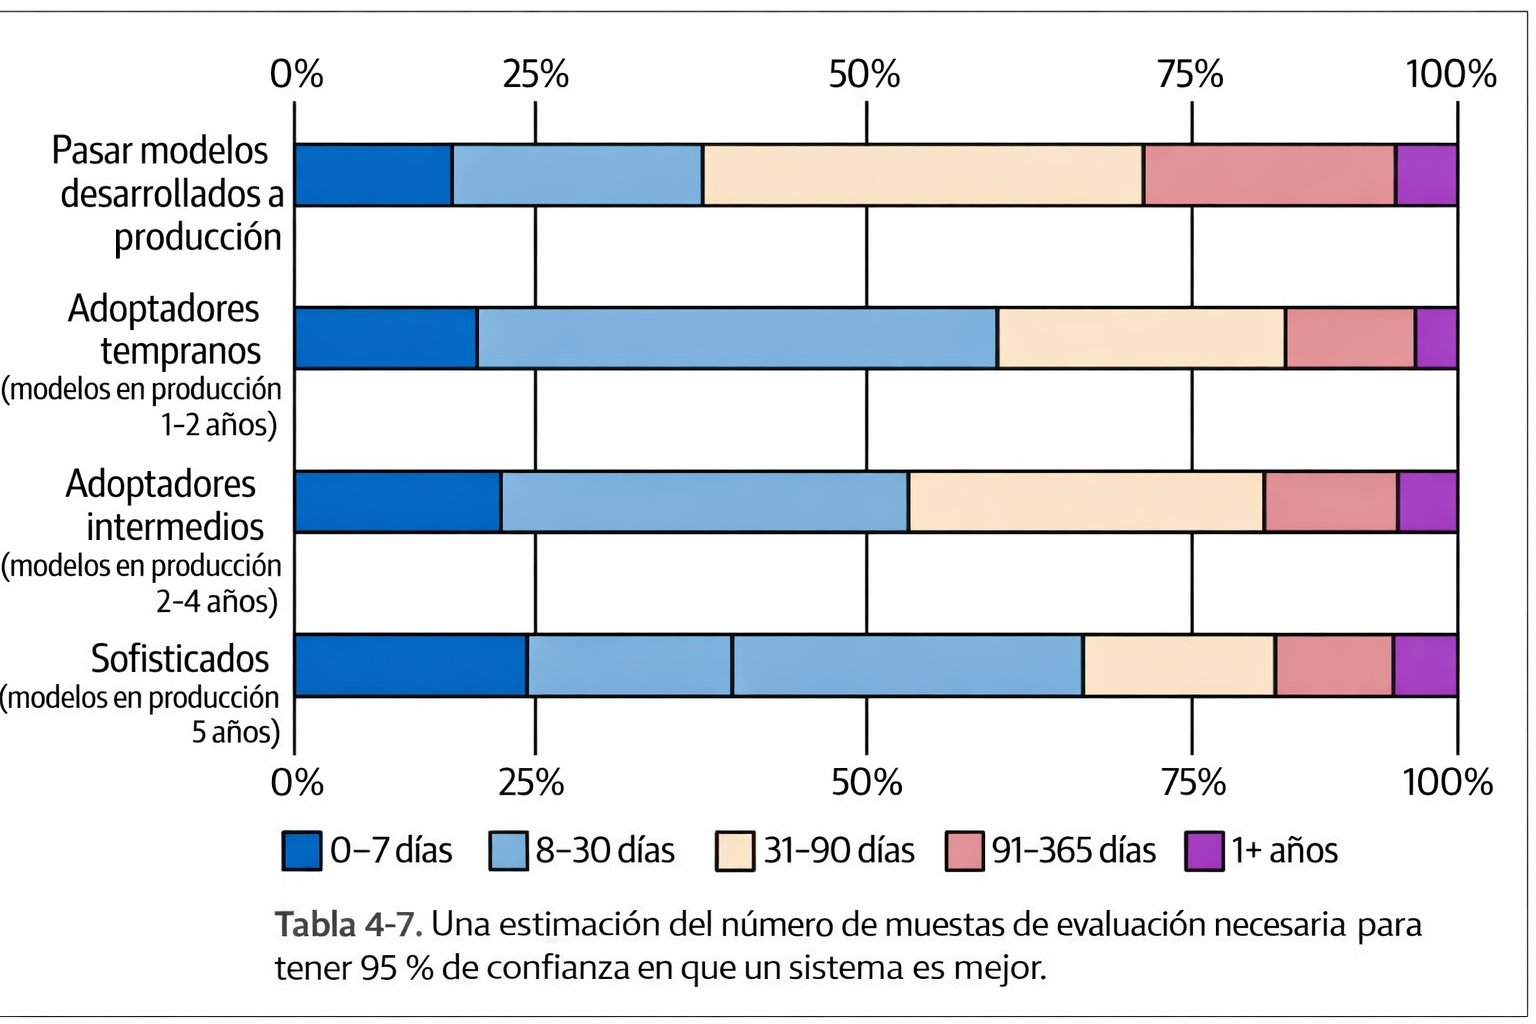

<small>
Figura 2-1. Tiempo que tarda una empresa en poner un modelo en producción. El tiempo que tarda una empresa en poner un modelo en producción es proporcional al tiempo que lleva utilizando el ML. Fuente: Adaptado de una imagen de Algorithmia.
</small>

## Requisitos de los Modelos de ML

No podemos decir que hemos construido con pexito un sistema de ML sin saber qué requisitos tiene que satisfacer el sistema. Los requisitos especificados para un sistema de ML varían de un caso de uso a otro. Sin embargo, la mayoría de los sistemas deben tener estas cuatro caracterísiticas: *fiabilidad, escalabilidad, mantenibilidad y adaptabilidad*. Repasaremos cada uno de estos conceptos en detalle. Veamos primero la fiabilidad.

### Fiabilidad

El sistema debe seguir realizando la función corecta con el nidel de rendimiento deseado, incluiso ante adversidades (fallos de hardware o software, e incluso errores humanos).

La `corrección` puede ser defícil de determinar para los sistemas ML. Por ejmplo, su sustema puede llamar a la función de predicción, por ejemplo, `model.predict()`, correctamente, pero las predicciones son erróneas. ¿Cómo podemos saber si una predicción es errónea si no disponemos de etiquetas de la verdad sobre el terreno con las que compararla?

Con los sistemas de software tradicionales, a menudo se recibe una advertencia, como un fallo del sistema o un error de ejecución o 404. Sin embargo, los sistemas de ML pueden fallar silenciosamente. Los usuarios finales ni siquiera saben que el sistema ha fallado y pueden haber seguido utilizándolo como si funcionara. Por ejemplo, si utilizas Google Translate para traducir una frase a un idioma que no conoces, puede que te resulta muy difícil darte cuenta incluso de que la traducción es incorrecta. Hablaremos de cómo fallan los sistemas de ML en producción en el Capítulo 8.

### Escalabilidad

Un sistema de ML puede crecer de muchas maneras. Puede crecer en complejidad. El año pasado, utilizó un modelo de regresión logística que sabía en una instancia de la capa gratuita de Amazon Web Services (AWS) con 1GB de RAM, pero este año ha cambiado a una red neurona con 100 millones de parámetros que requiere 16GB de RAM para generar predicciones.

Su sistema ML puede crecer en volumen de tráfico. Cuando empezó a desplegar un sistema ML, sólo servía 10.000 peticiones de predicción al día. Sin emabrgo, a medida qeu la base de usuarios de sue mpresa crece, el número de solicitudes de predicción que su sistema ML sirve diariamente fluctúa entre 1 millón y 10 millones.

Un sistema ML puede crecer en número de modelos ML. Al principio, puede que sólo tenga un modelo para un caso de uso, como detectar los hashtags de tendencia en una red social como Twitter. Sin embargo, con el tiempo, querrá añadir mpas funciones a este caso de uso, por lo que añadirá uno más para filtrar el contenido NSFW (no seguro para el trabajo) y otro modelo para filtrar tweets generados por bots. Este patrón de crecimiento es especialmente común en los sistemas ML que se sirigen a casos de uso empresarial. Inicialmente, una startup puede servir sólo a un cliente empresarial, lo que significa que sólo tiene un modelo. Sin embargo, a medida que esta startup gana más clientes, podría tener un modelo para cada cliente. Una startup con la que trabajé tenía 8.000 modelos en producción para sus 8.000 clientes empresariales.

Se cual sea la forma en que crezca el sistema, debe haver formas razonavles de gestionar ese crecimiento. Cuando se habla de escalabilidad, la mayoría de la gente piensa en el escalado de recursos, que consiste en aumentar (ampliar los recursos para gestionar el crecimiento) y reducir (reducir los recursos cuando no se necesitan).

Por ejemplo, en un momento de máximo rendimiento, el sistema puede necesitar 100 GPS (unidades de procesamiento gráfico). Sin embargo, la mayor parte del tiempo sólo necesita 10 GPU. Mantener 100 GPU activas todo el tiempo puede ser costoso, por lo que el sistema debe poder reducirse a 10 GPU.

Una función indispensable en muchos servicios en nube es el autoescalado: aumentar o reducir automáticamente el número de máquinas en función del uso. Esta función puede ser difícil de implementar. Incluso Amazon fue víctima de ello cuando su función de autoescalado falló en el Prime Day, provocando la caída de su sitema. Se calcula que una hora de inactividad le cósto a Amazon entre 72 y 99 millones de dólares.

--- 
<small>

📚 8 La ampliación y la reducción son dos aspectos de la "ampliación", que es diferente de la "ampliación". La ampliación consiste en añadir más componentes funcionales equivalentes en paralelo para repartir la carga. Aumentar es hacer un componente más grande o más rápido para manejar una carga mayor (Leah Schoeb, "Cloud Scalability: Scale Up vs Scale Out", Turbonomic Blog, 15 de marzo de 2018, https://oreil.ly/CFPtb).

📚 9 Sean Wolfe, "Amazon's One Hour of Downtime on Prime Day May Have Cost It up to $100 Million in Lost Sales", Business Insider, 19 de julio de 2018, https://oreil.ly/VBezI.

</small>

---

---
<small>
💡<b>TIP IMPORTANTE</b>

- CPU en Machine Learning
La CPU (Central Processing Unit) es el procesador general del sistema, optimizado para tareas secuenciales y de control. Es excelente para coordinar, pero ineficiente para cálculos matemáticos masivos.

Función en ML:
- Preprocesamietno de datos.
- Carga y validación de datasets.
- Orquestación del pipeline de ML.
- Ejecución de lógica, evaluaciones y control del entrenamiento.
- Inferencia ligera o de baja latencia.

- GPU en Machine Learning
La GPU (Graphics Processing Unit) es un procesador altamente paralelo, diseñado para operaciones matemáticas masivas en paralelo. Ideal para cómputo intensivo y paralelo.

Función en ML:
- Entrenamiento de modelos (especialmente en deep learning).
- Multiplicaciones de matrices y tensores.
- Backpropagation.
- Inferencia de alto rendimiento.

</small>

---

Sin embargo, gestionar el crecimiento no es sólo escalar recursos, sino también gestionar artefactos. Gestionar cien modelos es muy diferente de gestionar un modelo. Con un modelo, quizá pueda supervisar manualmente su rendimiento y actualizarlo manualmente con nuevos datos. Como sólo hay un modelo, puede tener un archivo que le ayude a reproducir este modelo siempre que sea necesario. Sin embargo, con cien modelos, habrá que automatizar tanto el aspecto de supervisión como el de reentrenamiento. Necesitarás una forma de gestionar la generación de código para poder reproducir adecuadamente un modelo cuando lo necesites.

Debido a que la escalabilidad es un tema tan importante a lo largo del flujo de trabajo de un proyecto de ML, lo discutiremos en diferentes partes del libro. Específicamente, tocaremos el aspecto del escalado de recursos en la sección "Entrenamiento Distribuido" en la página 168, en la sección "Optimización de Modelos" en la página 216, y en la sección " Gestión de Recursos" en la página 311. Trataremos el aspecto de la gestión de artefactos en la sección "Seguimiento de experimentos y control de versiones" en la página 162 y en la sección "Entorno de desarrollo" en la página 302.

### Mantenibilidad

Hay muchas personas qeu trabajarán en un sistema de ML. Son ingenieros de ML, ingenieros de DevOps de y expertos en la materia (MS). Pueden proceder de entornos muy distintos, con lenguajes de programación y herramientas muy diferentes, y pueden ser propietarios de distintas partes del proceso.

Es importante estructurar las cargas de trabajo y configurar la infraestctura de forma que los disntitos colaboradores puedan trabajar con las herramientas que las resulten más cómodas, en lugar de que un grupo de colaboradores imponga sus herramientas a otros grupos. El código debe estar documentado. El código, los datos y los artegactos deben estar versionados. Los modelos deben ser lo suficientemente reproducibles como para que, incluso cuando los autores originales no estén, otros colaboradores puedan disponer de contextos suficientes para basarse en su trabajo. Cuando surja un problema, los distintos colaboradores deben ser capaces de trabajar juntos para identificar el problema y aplicar un solución sin señalar a nadie.

Profundizaremos en este tema en la sección "Estructura del equipo", en la página 334.

### Adaptabilidad

Para adaptarse a los cambios en la distribución de datos y a las necesidades de la empresa, el sistema debe tener cierta capacidad para descubir aspectos que permitan mejorar el rendimiento como para permitir actualizaciones sin interrupción del servicio.

Dado que los sistemas de ML son parte código y en parte datos, y que los datos pueden cambiar rápidamente, los sistemas de ML deben poder evoluacionar con rapidez. Esta está estrechamente relacionado con la mantenibilidad. Discutiremos los cambios en la distribución de datos en la sección "Cambios en la distribución de datos" en la pa´gina 237, y cómo actualizar continuamente su modelo con nuevos datos en la sección "Aprendizaje continuo" en la página 264.

### Proceso Iterativo

El desarrollo de un sistema de ML es un proceso iterativo y, en la mayoría de los casos, interminale. Una vez que el sistema se pone en producción, habrá que supervisarlo y actualizarlo continuamente.

Antes de implementar mi primer sistema de ML, pensaba que el proceso sería lineal y directo. Pensé que todo lo que tendría que hacer sería recopilar datos, formar un modelo, implementarlo y ya. Sin embargo, proncto me di cuenta de que el proceso se parece más a un ciclo con muchas idas y venidas entre las distintas etapas.

Por ejemplo, este es un flujo de trabajo que puede encontrarse al crear un modelo de AA (modelo de aprendizaje automatico) para predecir si debe mostrarse un anuncio cuando los usuarios introducen una consulta de búsqueda:

1. Seleccione una métrica para optimizar. Por ejemplo, es posible que desee optimizar las impresiones, el número de veces que se muestra un anuncio.

2. Recopilar datos y obtenga etiquetas.

3. Cree atributos.

4. Forme modelos.

5. Durante el análisis de errores, se da cuenta de que los errores son causados por las etiquetas incorrectas, por lo que vuelve a etiquetar los datos.

6. Vuelva a formar el modelo.

7. Durante el analisis de errores, se de cuenta de que el modleo siempre predice que un anuncio no debe mostrarse y la razón es que el 99.99% de los datos tiene etiquetas NEGATIVAS (anuncios que no deben mostrarse). Por lo tanto, hay que recopilar más datos de los anuncios que deben mostrarse.

8. Vuelva a formar el modelo.

9. El modelo funciona bien en sus datos de prueba existentes, que ya tienen dos meses de antiguedad. Sin embargo, funciona mal en los datos de ayer. Su modelo está anticuado, por lo que debe actualizarlo con datos más recientes.

10. Vuelva a formar el modelo.

11. Instálelo.

12. El modelo parece funcionar bien, pero entonces los empresarios llamana su puerta preguntando por qué disminuyen los ingresos. Resulta que los anuncios se muestran, pero pocas personas pinchan en ellos. Así que quiere cambiar su modelo para optimizar la tasa de clics de los anuncios en su lugar.

13. Vala al paso 1.




En la Figura 2-2 se mustra una representación simplificada de cómo se ve el proceso iterativo para desarrollar sistemas de AA en producción desde la perspectiva de un científio de datos o un ingeniero de AA. Este proceso se ve diferente desde la perspectiva de un ingeniero de plataforma de AA o uno de DevOps, ya que puede que no tengan tano contexto en el desarrollo de moslode y podrían dedicar mucho más tiempo a configurar la infraestructura.

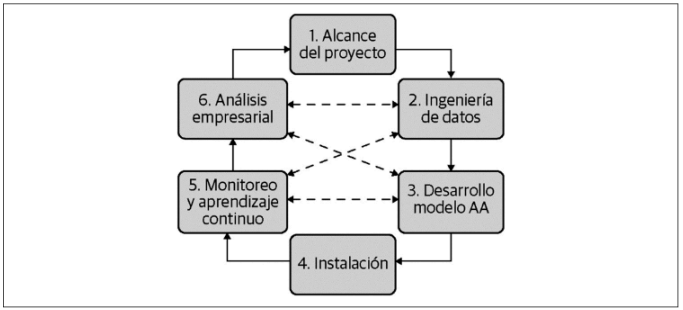

<small>
Figura 1 2-2. El proceso de desarrollo de un sistema de AA se parece más a una ciclo con muchas ideas y venidas entre etapas
</small>

Los capítulos posteriores profundizarán en lo que cada uno de estos pasos requiere en la práctica. Veamos brevemente lo que significan:

**Paso 1. Alcance del Proyecto**: 

Un proyecto comienza con el alcance, estableciendo metas, objetivos y restricciones. Hay que identificar e implicar a las partes interesadas. Los recursos deben estimarse y asignarse. Ya discutumos diferentes partes interesadas y algunos de los focos para los proyectos de AA en producción en el capítulo 1. En este capítulo ya hemos halado también de cómo definir el alcance de un proyecto de AA en el contexto de una empresa. Discutiremos cómo organizar equipos para asegurar el éxito de un proyecto de AA en el capítulo 11.

---

<small>
El `alcance de un proyecto` es la definición clara y delimitada de todo lo que el proyecto incluye y lo que excluye, especificando qué se va a entregar, hasta dónde llega el trabajo y bajo qué condiciones se considera terminado.

Este alcance establece:
* Qué se va a hacer (objetivos y entregables).
* Qué no se va a hacer (límites explícitos).
* Cuáles son los resultados esperados.
* Cuándp el proyectos se considera completo.

Su función principal es evitar ambiguedades, sobrecostos y cambios no controlados durante la ejecución del proyecto. El alcance define los límites formales del proyecto y actúa como un contrato técnico entre las partes ivolucradas.

Componentes clave:
* Objetivo del proyecto.
* Entregables concretos.
* Requisitos funcionales y no funcionales.
* Exclusiones.
* Criterios de aceptación.

</small>

---

🧠
<small>
Alcance de un proyecto de machine learning

El alcance de un proyecto de ML define qué problema se va a resolver con modelos de aprendizaje automático, qué datos se utilizarán, qué resultados se entregarán y hasta dónde llega la responsabilidad del modelo, incluyendo sus limitaciones técnicas y operativas.

* Problema a resolver
  * Qué se predice, clasifica u optimiza (y qué no)

* Datos
  * Fuentes de datos
  * Periodo temporal
  * Variables incluidas y excluidas
  * Calidad mínima esperada

* Modelo
  * Tipo de enfoque (supervisado, no supervisado, etc)
  * Algoritmo considerados
  * Nivel de complejidad esperado (baseline vs avanzado)

* Métricas de éxito
  * Cómo se medirá el rendimiento (accuracy, RMSE, F1, etc)
  * Umbrales mínimos aceptable

* Entregables
  * Modelo entrenado
  * Código reproducible
  * Reporte de resultados
  * OPCIONAL - API o pipeline de inferencia

* Exclusiones
  * Casos fuera del dominio
  * Reentrenamiento continuo
  * Explicabilidad avanzada si no está incluida
  * Despliegue en producción (si no aplica)

* Criterios de Cierre
  * Cuándo el modelo se considera terminado y aceptado

  <small>

**Paso 2. Ingeniería de datos**

La gran mayoría de los modelos de AA hoy en día aprenden de los datos, por lo que el desarrollo de modelos de AA comienza con la ingeniería de los datos. En el capítulo 3, discutiremos los fundamentos de la ingeniería de datos, que cubre la gestión de los datos de diferentes funetes y formatos. Con el acceso de los datos en bruto, a partir de ellos querremos curar los datos de formación mediante el muestreo y la generación de estiquetas, que se trata en el capítulo.

**Paso 3. Desarrollo del modelo de AA**

Con el conjunto inicial de datos de formación, necesitaremos extraer atributos y desarrollar modelos iniciales que los aprovechen. Esta es la etapa que requiere más conocimientos de AA, y se cubre con mayor frecuencia en los cursos de AA. En el capítulo 5 discutiremos la creación de atributos. En el capítulo 6 discutiremos la selección de modelos, la formación y la evaluación.

**Paso 4. Instalación**

Una vez desarrollado un modelo, este debe hacerse accesible a los usuarios. Desarrollar un sistema de AA es como escribir: nunca llegará al punto en que su sistema esté terminado. Pero sí llegará al punto en que tenga que poner el sistema a funcionar.

**Paso 5. Monitoreo y Aprendizaje Continuo**

Una vez en producción, hay que monitorear los modelos para comprobar si decaen en rendimiento, y mantenerlos para que se adapten a entornos y requisitos cambiantes. Este paso se discutirá en los capítulos 8 y 9.

**Paso 6. Análisis de Negocio**

El rendimiento del modelo debe evaluarse en función de los obejtivos empresariales, y debe analizarse para generar información empresarial. Estos conocimientos se pueden utilizar para eliminar proyectos no productivos o diseñar proyectos nuevos. Este paso está estrechamente relacionado con el primer paso.


## Planteamieno de problemas de Aprendizaje Automatico

Imagine que es un líder de tecnología de ingeniería de AA en un banco orientado a usuarios de la generación del milenio. Un día su jefe oye hablar de un banco rival que utiliza AA para agilizar su servicio de atención al cliente, lo que supuestamente le ayuda a procesar las solicitudes de sus clientes dos veces más rápidos. Ordena a su equipo que estudie también la posibilidad de utilizar el AA con el fin de agilizar el sevicio de atención al cliente.

La atención lenta al cliente es un problema, pero no es un problema de AA. Un problema de AA se define por entradas, salidas y la función objetivo que guía el proceso de aprendizaje; ninguno de estos tres componentes es obvio por la solicitud de su jefe. En su trabajo, como ingeniera experimentada de AA, utilizar su conocimiento de los problemas que AA puede resolver para enmarcar esta solicitud como un problema de AA.

Tras la investigación, descubrirá que el cuello de botella al responder a las solicitudes de los clientes radica en enrutar las solicitudes de los clientes al departamento correcto, entre cuatro departamentes: contabilidad, invetario, recursos humanos e informática. Puede aliviar este cuello de botella desarrollando un modelo de AA para predecir a cuál de estos cuatro departamentos debe ir una solicitud. Esto lo convierte en un problema de clasificación. La ntrada es la solicitud del cliente. La salida es el departamento al que debe ir. La función objetivo es minimizar la diferencia entre el departamento previsto y el departamento real.

Discutiremos extensamente cómo extraer atributos de los datos sin procesar para introducirlos en su modelo de AA en el capítulo 5. En esta sección, nos centraremos en dos aspecto: la salida de su modelo y la función objetivo que guían el proceso de aprendizaje.

🧠

<small>
FUNCIÓN OBJETIVO

Una función obetivo es la expresión matemática que define qué significa "hacerlo bien" en un problema, y que el modelo busca optimizar (minimizar o maximizar) durante el entrenamiento.

La función objetivo:
* Cuantifica el error o desempeño del modelo.
* Guía el proceso de aprendizaje.
* Determina qué solución es mejor que otra.

La función objetivo traduce el objetivo del problema en un valor numérico optimizable.

* Minimiza el error de predicción
* Maximizar la probabilidad correcta.
* Maximizar la recompenda acumulada.

</small>

### Tipos de Tareas de AA

La salida de su modelo determina el tipo de tarea de su problema de AA. Los tipos más generales de tareas de AA son la clasificación y la regresión. Dentro de la clasificación, hay más subtipos, como se muestra en la Figura 2-3. Representaremos cada uno de estos tipos de tareas.

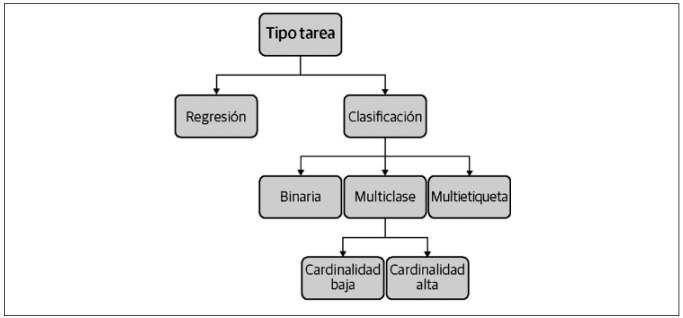

<small>
Figura 1 2-3. Tipos de Taread habituales en AA.
</small>

### Clasificación Frente a Regresión

Los modelos de clasificación clasifican las entradas en diferentes categorías. Por ejemplo, desea clasificar cada correo electrónico para que sea basura o no basura. Los modelos de regresión generan un valor continuo. Un ejemplo es un modelo de predicción de casas que genera el precio de una cada determinada.

Un modelo de regresión se puede enmarcar fácilmente como un modelo de clasificación y viceversa. Por ejemplo, la predicción de la casa puede convertirse en una tarea de clasificación si cuantificamos los precios de la casa en categorías como, por ejemplo, menos de 100.000 $, 100.000 $ - 200.000 $, 200.000 - 500.000 $... y así sucesivamente, y predecimo la categoría en la que debe estar la casa.

El modelo de clasificación de correo de electrónico puede convertirse en un modelo de regresión si lo hacemos con valores de salida entre 0 y 1 y decidimos un umbral para determinar qué valores deben ser BASURA (por ejemplo, si el valor es superior a 0.5, el correo electrónico es basura), como se muestra en la Figura 2-4.

![Figura 2-4.png](<attachment:Figura 2-4.png>)
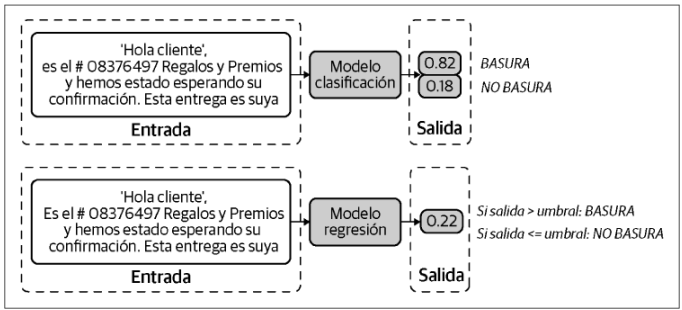

<small>
Figura 1 2-4. La tarea de clasificación de correos electrónicos también puede plantearse como una tarea de regresión.
</small>

pagina: 61